<a href="https://colab.research.google.com/github/MargaritaKotova/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence-course/blob/master/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !pip install "tensorflow>=2.0.0"
 import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 3.9MB 33.2MB/s 
     |████████████████████████████████| 450kB 54.2MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0
2.1.0


In [0]:
from sklearn.datasets import load_breast_cancer 

In [0]:
data = load_breast_cancer()

In [0]:
type(data)

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.target.shape

(569,)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
N

381

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)), tf.keras.layers.Dense(1,activation='sigmoid')])

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100)


print("Train score:", model.evaluate(X_train, y_train))
print("Test score", model.evaluate(X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.6370 - accuracy: 0.7060 - val_loss: 0.4950 - val_accuracy: 0.7713
Epoch 2/100
381/381 [==============================] - 0s 87us/sample - loss: 0.5877 - accuracy: 0.7270 - val_loss: 0.4578 - val_accuracy: 0.8032
Epoch 3/100
381/381 [==============================] - 0s 81us/sample - loss: 0.5425 - accuracy: 0.7559 - val_loss: 0.4255 - val_accuracy: 0.8138
Epoch 4/100
381/381 [==============================] - 0s 88us/sample - loss: 0.5033 - accuracy: 0.7743 - val_loss: 0.3967 - val_accuracy: 0.8511
Epoch 5/100
381/381 [==============================] - 0s 102us/sample - loss: 0.4680 - accuracy: 0.8005 - val_loss: 0.3719 - val_accuracy: 0.8617
Epoch 6/100
381/381 [==============================] - 0s 85us/sample - loss: 0.4370 - accuracy: 0.8163 - val_loss: 0.3500 - val_accuracy: 0.8617
Epoch 7/100
381/381 [==============================] - 0s 90us/sample - loss: 

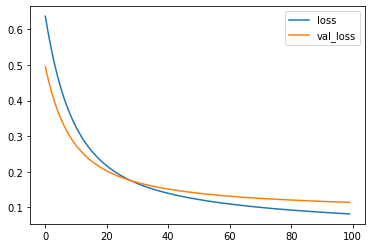

In [16]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

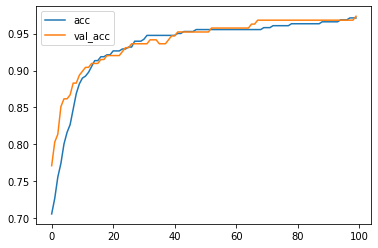

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Making Predictions

In [19]:
P = model.predict(X_test)
print(P) #there are outputs of the sigmoid, interpreted as probabilities p(y=1|x)

[[9.7051346e-01]
 [9.9792981e-01]
 [9.9516195e-01]
 [1.2294322e-04]
 [3.0139706e-03]
 [2.5770403e-04]
 [8.4577137e-01]
 [8.1810164e-01]
 [9.8415011e-01]
 [9.9976856e-01]
 [9.8480636e-01]
 [5.6730294e-01]
 [9.2923713e-01]
 [4.4514646e-04]
 [9.6788937e-01]
 [6.1615282e-01]
 [9.9162579e-01]
 [8.1049603e-01]
 [9.8547965e-01]
 [9.9912971e-01]
 [6.1794168e-07]
 [3.1821690e-03]
 [9.9047571e-01]
 [9.9802375e-01]
 [1.4975488e-01]
 [9.6851236e-01]
 [9.8034602e-01]
 [9.9162251e-01]
 [1.2586108e-06]
 [2.5908621e-02]
 [9.9026251e-01]
 [6.5517962e-01]
 [9.4150692e-01]
 [9.9632758e-01]
 [7.4193403e-02]
 [9.3015587e-01]
 [9.8497492e-01]
 [9.7222555e-01]
 [1.6484625e-03]
 [9.9843806e-01]
 [9.5443052e-01]
 [9.5309818e-01]
 [9.8193109e-01]
 [8.8821912e-01]
 [9.9866426e-01]
 [9.9281478e-01]
 [1.9383140e-05]
 [9.7246766e-01]
 [8.8005143e-01]
 [9.9603540e-01]
 [3.2017893e-01]
 [9.2261422e-01]
 [4.5215194e-05]
 [9.9138331e-01]
 [9.9920326e-01]
 [2.6909319e-01]
 [9.7647637e-01]
 [9.9562931e-01]
 [9.9540246e-0

In [20]:
import numpy as np

P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.]


In [21]:
print("Manually calculated accuracy", np.mean(P == y_test))
print("Evaulated accuracy", model.evaluate(X_test, y_test))

Manually calculated accuracy 0.973404255319149
188/188 [==============================] - 0s 74us/sample - loss: 0.1141 - accuracy: 0.9734
Evaulated accuracy [0.11412486544948944, 0.9734042]
